# Portrait plot using Matplotlib 

- Generate a static image of Portrait plot (with or without triangles) using Matplotlib.
- Author: Jiwoo Lee (2021.07)
- Last update: 2021.08

## 1. Read data from JSON files

Input data for portrait plot is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

### 1.1 Provide PMP output JSON files

In [1]:
import glob
import os
import numpy as np

In [2]:
mip = 'cmip6'
#data_version = "v20201008"
#data_version = "v20210805"
data_version = "v20210806"
json_dir = '/Users/lee1043/Documents/Research/PMP/mean_climate/json_files/'

In [3]:
json_list = sorted(glob.glob(os.path.join(json_dir, '*' + mip + '*' + data_version + '.json')))
for json_file in json_list:
    print(json_file.split('/')[-1])

pr.cmip6.historical.regrid2.2p5x2p5.v20210806.json
prw.cmip6.historical.regrid2.2p5x2p5.v20210806.json
psl.cmip6.historical.regrid2.2p5x2p5.v20210806.json
rlds.cmip6.historical.regrid2.2p5x2p5.v20210806.json
rltcre.cmip6.historical.regrid2.2p5x2p5.v20210806.json
rlus.cmip6.historical.regrid2.2p5x2p5.v20210806.json
rlut.cmip6.historical.regrid2.2p5x2p5.v20210806.json
rlutcs.cmip6.historical.regrid2.2p5x2p5.v20210806.json
rsds.cmip6.historical.regrid2.2p5x2p5.v20210806.json
rsdscs.cmip6.historical.regrid2.2p5x2p5.v20210806.json
rsdt.cmip6.historical.regrid2.2p5x2p5.v20210806.json
rstcre.cmip6.historical.regrid2.2p5x2p5.v20210806.json
rsut.cmip6.historical.regrid2.2p5x2p5.v20210806.json
rsutcs.cmip6.historical.regrid2.2p5x2p5.v20210806.json
sfcWind.cmip6.historical.regrid2.2p5x2p5.v20210806.json
ta-200.cmip6.historical.regrid2.2p5x2p5.v20210806.json
ta-850.cmip6.historical.regrid2.2p5x2p5.v20210806.json
tas.cmip6.historical.regrid2.2p5x2p5.v20210806.json
tauu.cmip6.historical.regrid2.2p5x

### 1.2 Define statistics and regions to extract from the above JSON files

In [4]:
stats = ['rms_xyt', 'rms_xy', 'rmsc_xy', 'bias_xy']
regions = ['global', 'TROPICS', 'NHEX', 'SHEX']

### 1.3 Extract data from JSON files

Use `read_mean_clim_json_files` function to extract data from the above JSON files.

#### Parameters
- `json_list`: list of string, where each element is for path/file for PMP output JSON files
- `stats`: list of string, where each element is statistic to extract from the JSON
- `regions`: list of string, where each element is region to extract from the JSON
- `mip`: string, category for mip, e.g., 'cmip6'.  Optional
- `debug`: bool, default=False, enable few print statements to help debug

#### Returns
- `df_dict`: dictionary that has `[stat][season][region]` hierarchy structure storing pandas dataframe for metric numbers (Rows: models, Columns: variables (i.e., 2d array)
- `var_list`: list of string, all variables from JSON files
- `var_unit_list`: list of string, all variables and its units from JSON files

In [5]:
from pcmdi_metrics.graphics import read_mean_clim_json_files

df_dict, var_list, var_unit_list = read_mean_clim_json_files(json_list, stats, regions, mip=mip)

In [6]:
print('var_list:', var_list)
print('var_unit_list:', var_unit_list)

var_list: ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'zg-500', 'ta-200', 'ta-850', 'tas', 'tauu', 'ua-200', 'ua-850', 'va-200', 'va-850']
var_unit_list: ['pr [N/A]', 'prw [N/A]', 'psl [N/A]', 'rlds [N/A]', 'rltcre [W m-2]', 'rlus [N/A]', 'rlut [N/A]', 'rlutcs [N/A]', 'rsds [N/A]', 'rsdscs [N/A]', 'rsdt [N/A]', 'rstcre [W m-2]', 'rsut [N/A]', 'rsutcs [N/A]', 'sfcWind [N/A]', 'zg-500 [N/A]', 'ta-200 [N/A]', 'ta-850 [N/A]', 'tas [N/A]', 'tauu [N/A]', 'ua-200 [N/A]', 'ua-850 [N/A]', 'va-200 [N/A]', 'va-850 [N/A]']


In [7]:
df_dict['rms_xy']['djf']['global']

,mip,model,run,model_run,pr,prw,psl,rlds,rltcre,rlus,...,sfcWind,zg-500,ta-200,ta-850,tas,tauu,ua-200,ua-850,va-200,va-850
0,cmip6,ACCESS-CM2,r1i1p1,ACCESS-CM2_r1i1p1,1.661,139.039,245.952,11.552,8.519,10.560,...,562.851,2.717,1.495,2.508,0.040,4.174,1.421,1.689,0.799,26.053
1,cmip6,ACCESS-ESM1-5,r1i1p1,ACCESS-ESM1-5_r1i1p1,1.739,139.068,215.795,10.553,7.358,10.352,...,563.185,2.551,1.335,2.106,0.035,3.305,1.408,1.804,0.859,25.470
2,cmip6,AWI-CM-1-1-MR,r1i1p1,AWI-CM-1-1-MR_r1i1p1,1.604,139.179,170.936,11.231,7.957,8.496,...,563.034,1.847,1.074,1.414,0.028,2.483,1.251,1.586,0.711,16.738
3,cmip6,AWI-ESM-1-1-LR,r1i1p1,AWI-ESM-1-1-LR_r1i1p1,1.937,139.199,201.589,14.743,8.935,12.495,...,563.223,3.966,2.224,2.039,0.034,3.835,1.684,2.241,1.024,NaN
4,cmip6,BCC-CSM2-MR,r1i1p1,BCC-CSM2-MR_r1i1p1,1.700,139.251,237.180,13.025,7.370,11.014,...,563.549,NaN,NaN,2.669,0.034,NaN,NaN,NaN,NaN,NaN
5,cmip6,BCC-ESM1,r1i1p1,BCC-ESM1_r1i1p1,1.631,139.152,237.973,14.469,8.423,12.970,...,563.381,4.343,2.055,3.211,0.038,4.673,1.849,2.119,1.118,NaN
6,cmip6,CAMS-CSM1-0,r1i1p1,CAMS-CSM1-0_r1i1p1,1.721,139.513,182.945,19.644,8.397,14.631,...,562.594,NaN,NaN,3.462,NaN,NaN,NaN,NaN,NaN,NaN
7,cmip6,CESM2,r1i1p1,CESM2_r1i1p1,1.234,139.212,210.704,11.026,6.979,9.611,...,563.301,2.057,1.309,1.483,0.089,3.433,1.377,1.973,0.800,NaN
8,cmip6,CESM2-FV2,r1i1p1,CESM2-FV2_r1i1p1,1.397,139.161,242.138,12.376,7.835,10.690,...,563.262,3.026,1.987,1.892,0.090,4.017,2.061,2.204,0.988,NaN
9,cmip6,CESM2-WACCM,r1i1p1,CESM2-WACCM_r1i1p1,1.203,139.166,205.141,10.544,6.761,9.166,...,563.279,NaN,NaN,1.462,0.088,3.131,1.481,1.761,0.787,NaN


In [8]:
#var_list = ["pr", "psl", "rltcre", "rlut", "rstcre", "rsut", "ta-200", "ta-850", "tas", "ts",
#            "ua-200", "ua-850", "va-200", "va-850", "zg-500"]

In [9]:
data_djf = df_dict['rms_xy']['djf']['global'][var_list].to_numpy()
data_mam = df_dict['rms_xy']['mam']['global'][var_list].to_numpy()
data_jja = df_dict['rms_xy']['jja']['global'][var_list].to_numpy()
data_son = df_dict['rms_xy']['son']['global'][var_list].to_numpy()
model_names = df_dict['rms_xyt']['ann']['global']['model'].tolist()
data_all = np.stack([data_djf, data_mam, data_jja, data_son])
print('data.shape:', data_all.shape)
print('len(var_list): ', len(var_list))
print('len(model_names): ', len(model_names))

xaxis_labels = var_list
yaxis_labels = model_names

data.shape: (4, 45, 24)
len(var_list):  24
len(model_names):  45


### 1.4 Normalize each column by its median

Use `normalize_by_median` function.

#### Parameters
- `data`: 2d numpy array
- `axis`: 0 (normalize each column) or 1 (normalize each row), default=0 

#### Return
- `data_nor`: 2d numpy array

In [10]:
from pcmdi_metrics.graphics import normalize_by_median

data_djf_nor = normalize_by_median(data_djf)
data_mam_nor = normalize_by_median(data_mam)
data_jja_nor = normalize_by_median(data_jja)
data_son_nor = normalize_by_median(data_son)

In [11]:
data_all_nor = np.stack([data_djf_nor, data_mam_nor, data_jja_nor, data_son_nor])
data_all_nor.shape

(4, 45, 24)

## 2. Matplotlib-based PMP Visualization Function

In [12]:
from pcmdi_metrics.graphics import portrait_plot

<p id="parameters"></p>

Parameters
----------
- `data`: 2d numpy array, a list of 2d numpy arrays, or a 3d numpy array (i.e. stacked 2d numpy arrays)
- `xaxis_labels`: list of strings, labels for xaixs. Number of list element must consistent to x-axis, or 0 (empty list) to turn off xaxis tick labels
- `yaxis_labels`: list of strings, labels for yaxis. Number of list element must consistent to y-axis, or 0 (empty list) to turn off yaxis tick labels
- `fig`: [`matplotlib.figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `ax`: [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/axes_api.html) instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `annotate`: bool, default=False, add annotating text if true, but work only for heatmap style map (i.e., no triangles)
- `annotate_data`: 2d numpy array, default=None. If None, the image's data is used.  Optional. 
- `annotate_fontsize`: number (int/float), default=15. Font size for annotation
- `figsize`: tuple of two numbers (width, height), default=(12, 10), figure size in inches
- `vrange`: tuple of two numbers, range of value for colorbar.  Optional.
- `xaxis_fontsize`: number, default=15, font size for xaxis tick labels
- `yaxis_fontsize`: number, default=15, font size for yaxis tick labels
- `cmap`: string, default="RdBu_r", name of matplotlib colormap
- `cmap_bounds`: list of numbers.  If given, discrete colors are applied.  Optional.
- `cbar_label`: string, default=None, label for colorbar
- `cbar_label_fontsize`: number, default=15, font size for colorbar labels
- `cbar_tick_fontsize`: number, default=12, font size for colorbar tick labels
- `cbar_kw`: A dictionary with arguments to [`matplotlib.Figure.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html).  Optional.
- `missing_color`: color, default="grey", [`matplotlib.axes.Axes.set_facecolor`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_facecolor.html) parameter
- `invert_yaxis`: bool, default=True, place y=0 at top on the plot
- `box_as_square`: bool, default=False, make each box as square
- `legend_on`: bool, default=False, show legend (only for 2 or 4 triangles portrait plot)
- `legend_labels`: list of strings, legend labels for triangls
- `legend_box_xy`: tuple of numbers, position of legend box's upper-left corner (lower-left if `invert_yaxis=False`), in `axes` coordinate
- `legend_box_size`: number, size of legend box
- `legend_lw`: number, line width of legend, default=1
- `legend_fontsize`: number, font size for legend, default=14
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the PMP logo. All quantities are in fractions of figure width and height.  Optional
- `logo_off`: bool, default=False, turn off PMP logo
- `debug`: bool, default=False, if true print more message when running that help debugging

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis
- `cbar`: matplotlib component for colorbar

## 3. Plot

## 3.1 Portrait Plot with 4 Triangles (4 seasons)

- data order is clockwise from top: top, right, bottom, left

Text(1.25, 0.9, 'Data version\nv20210806')

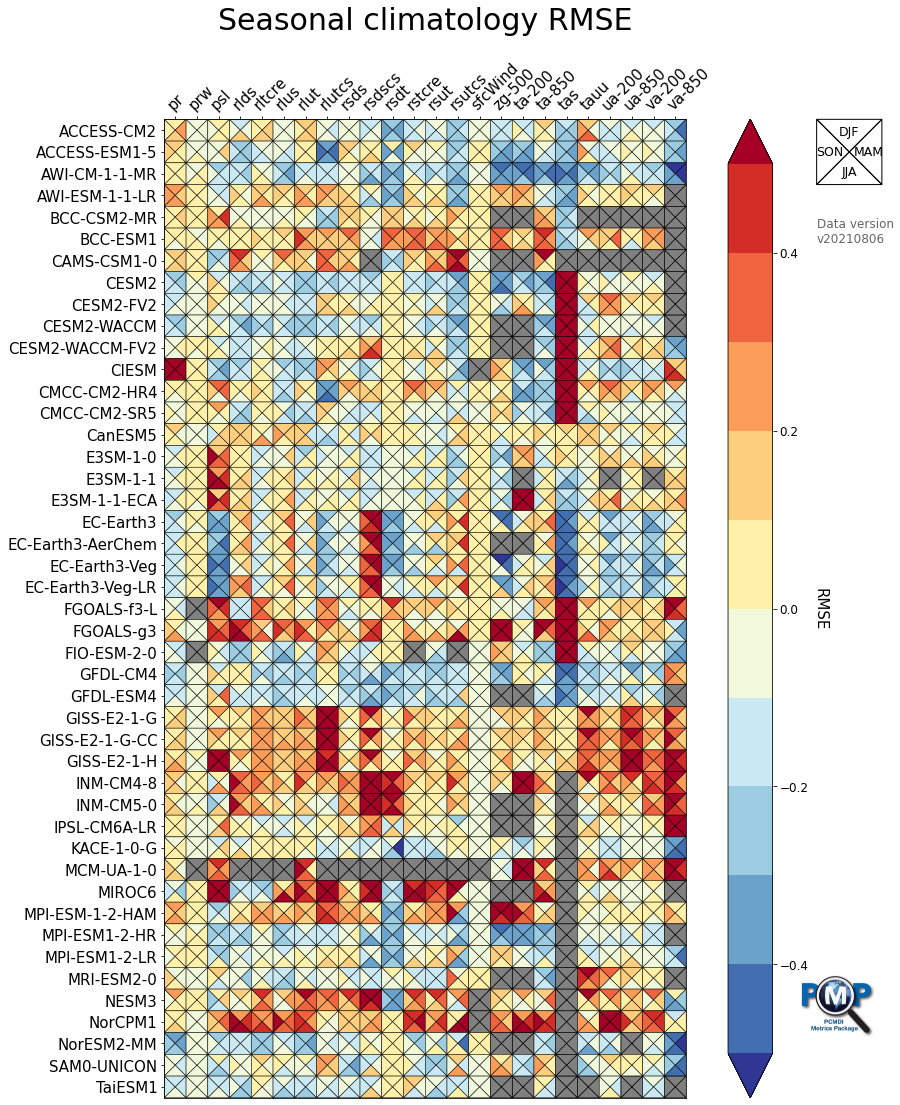

In [13]:
fig, ax, cbar = portrait_plot(data_all_nor,
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='RMSE',
                              box_as_square=True,
                              vrange=(-0.5, 0.5),
                              figsize=(15, 18),
                              cmap='RdYlBu_r',
                              cmap_bounds=[-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5],
                              cbar_kw={"extend": "both"},
                              missing_color='grey',
                              legend_on=True,
                              legend_labels=['DJF', 'MAM', 'JJA', 'SON'],
                              legend_box_xy=(1.25, 1),
                              legend_box_size=3,
                              legend_lw=1,
                              legend_fontsize=12.5,
                              logo_rect = [0.85, 0.15, 0.07, 0.07]
                             )
ax.set_xticklabels(xaxis_labels, rotation=45, va='bottom', ha="left")

# Add title
ax.set_title("Seasonal climatology RMSE", fontsize=30, pad=30)

# Add data info
fig.text(1.25, 0.9, 'Data version\n'+data_version, transform=ax.transAxes,
         fontsize=12, color='black', alpha=0.6, ha='left', va='top',)

In [14]:
# Save figure as an image file
fig.savefig('mean_clim_portrait_plot_4seasons_'+data_version+'.png', facecolor='w', bbox_inches='tight')

In [15]:
# Add Watermark
ax.text(0.5, 0.5, 'Example', transform=ax.transAxes,
        fontsize=100, color='black', alpha=0.6,
        ha='center', va='center', rotation='0')
# Save figure as an image file
fig.savefig('mean_clim_portrait_plot_4seasons_example.png', facecolor='w', bbox_inches='tight')

## 3.3 Portrait Plot with 2 Triangles (2 seasons)

Text(0.5, 1.0, 'Seasonal climatology RMSE')

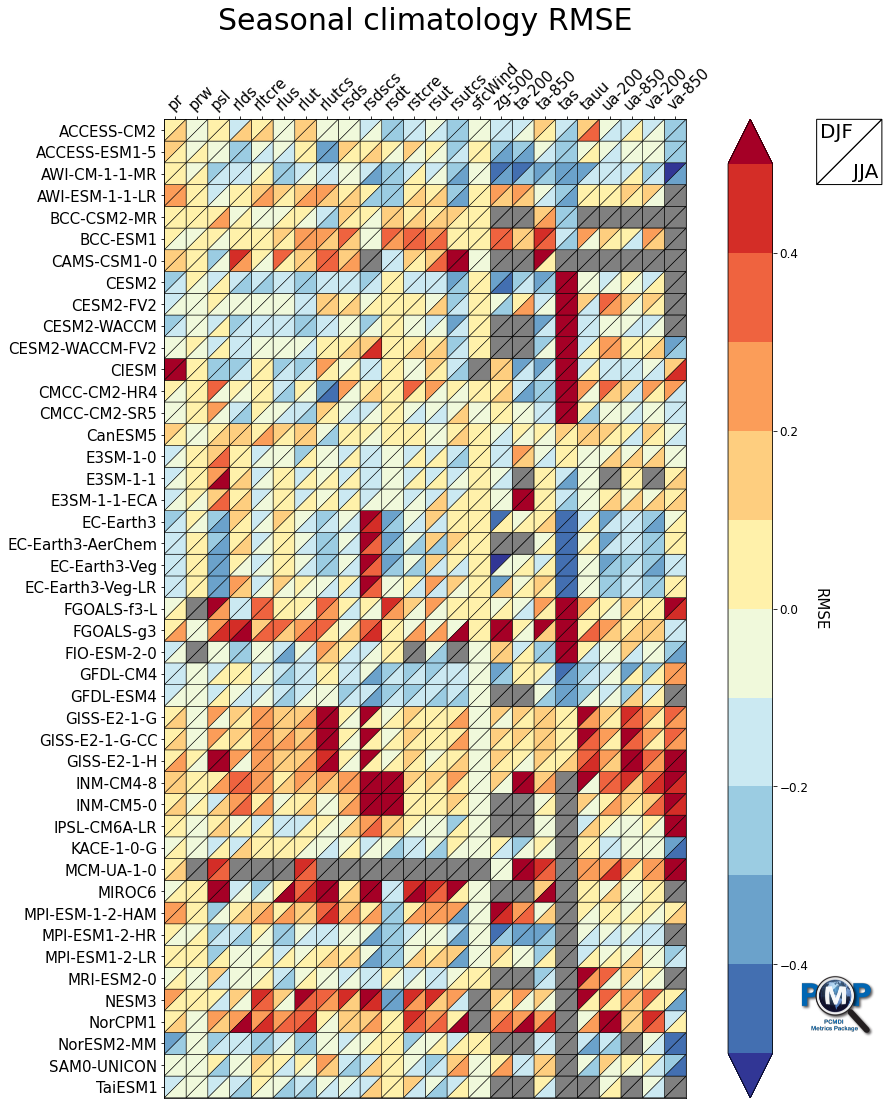

In [16]:
fig, ax, cbar = portrait_plot([data_djf_nor, data_jja_nor],
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='RMSE',
                              box_as_square=True,
                              vrange=(-0.5, 0.5),
                              figsize=(15, 18),
                              cmap='RdYlBu_r',
                              cmap_bounds=[-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5],
                              cbar_kw={"extend": "both"},
                              missing_color='grey',
                              legend_on=True,
                              legend_labels=['DJF', 'JJA'],
                              legend_box_xy = (1.25, 1),
                              legend_box_size=3,
                              legend_lw=1,
                              legend_fontsize=20,
                              logo_rect = [0.85, 0.15, 0.07, 0.07]
                             )
ax.set_xticklabels(xaxis_labels, rotation=45, va='bottom', ha="left")

# Add title
ax.set_title("Seasonal climatology RMSE", fontsize=30, pad=30)

## 3.3 Portrait Plot without Triangles (1 season)

Text(0.5, 1.0, 'Seasonal climatology RMSE: DJF')

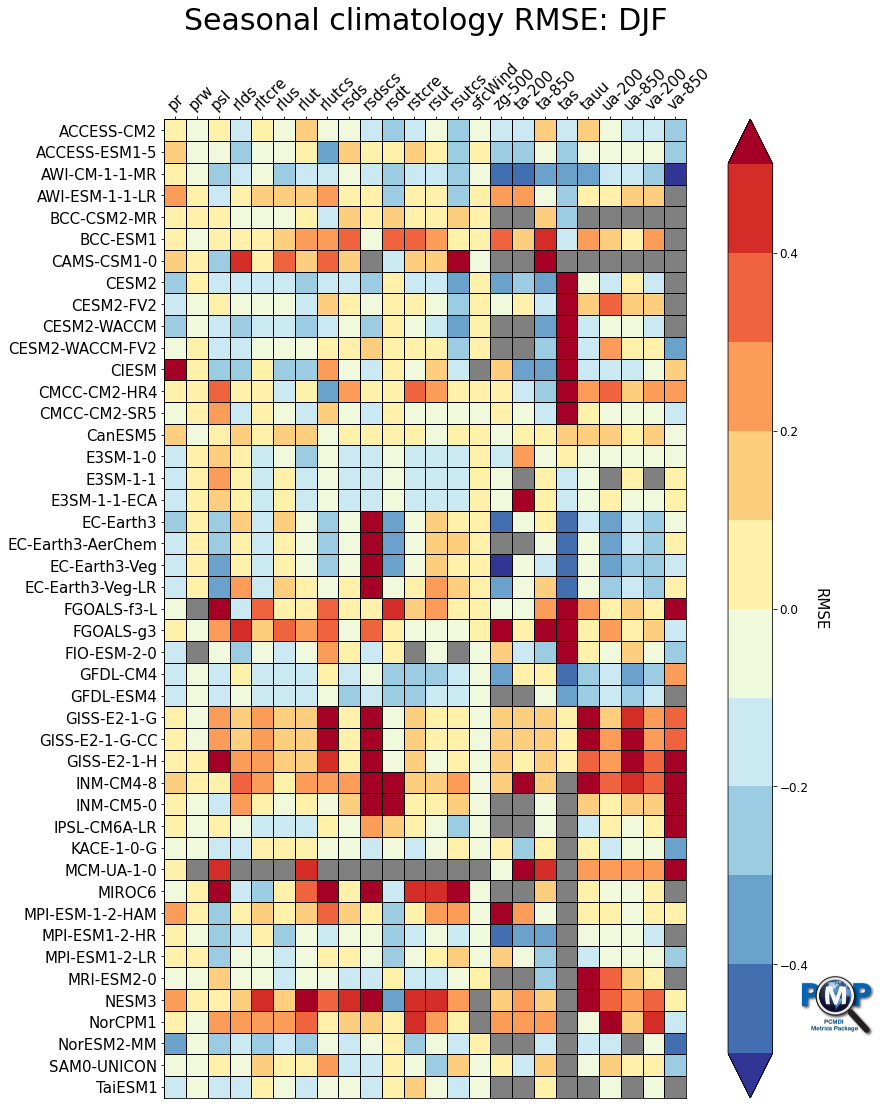

In [17]:
fig, ax, cbar = portrait_plot([data_djf_nor],
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='RMSE',
                              box_as_square=True,
                              vrange=(-0.5, 0.5),
                              figsize=(15, 18),
                              cmap='RdYlBu_r',
                              cmap_bounds=[-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5],
                              cbar_kw={"extend": "both"},
                              missing_color='grey',
                              logo_rect = [0.85, 0.15, 0.07, 0.07]
                             )
ax.set_xticklabels(xaxis_labels, rotation=45, va='bottom', ha="left")

# Add title
ax.set_title("Seasonal climatology RMSE: DJF", fontsize=30, pad=30)